### Reading data -> Annex 3 Inspection

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re 
data = pd.read_excel('./Annex_3_inspection.xlsx')
# Verifying that the code has been correctly loaded
print(data.head())

                     Product                            Comments  Status
0  Standard polystyrene case  Width measurement \ndoes not match     NaN
1  Standard polystyrene case  Width measurement \ndoes not match     NaN
2  Standard polystyrene case              Width does \nnot match     NaN
3  Standard polystyrene case              Width does \nnot match     NaN
4  Standard polystyrene case              Width does \nnot match     NaN


In [6]:
# The column to be analyzed of the xlsx is -> Comments
comments_column = 'Comments'

#Calculate the frequency of the values in the selected column
frequency = data[comments_column].value_counts()
frequency = frequency.sort_values(ascending=False)

# # Calculate the frequency of the values in the selected column.
frequency_response = data[comments_column].value_counts()
frequency_question = data[comments_column].value_counts()

# Calculate the cumulative frequency
accumulated_frecuency = frequency.cumsum() / frequency.sum() * 100

# Pareto of Standar Polystyrene case (comments)

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


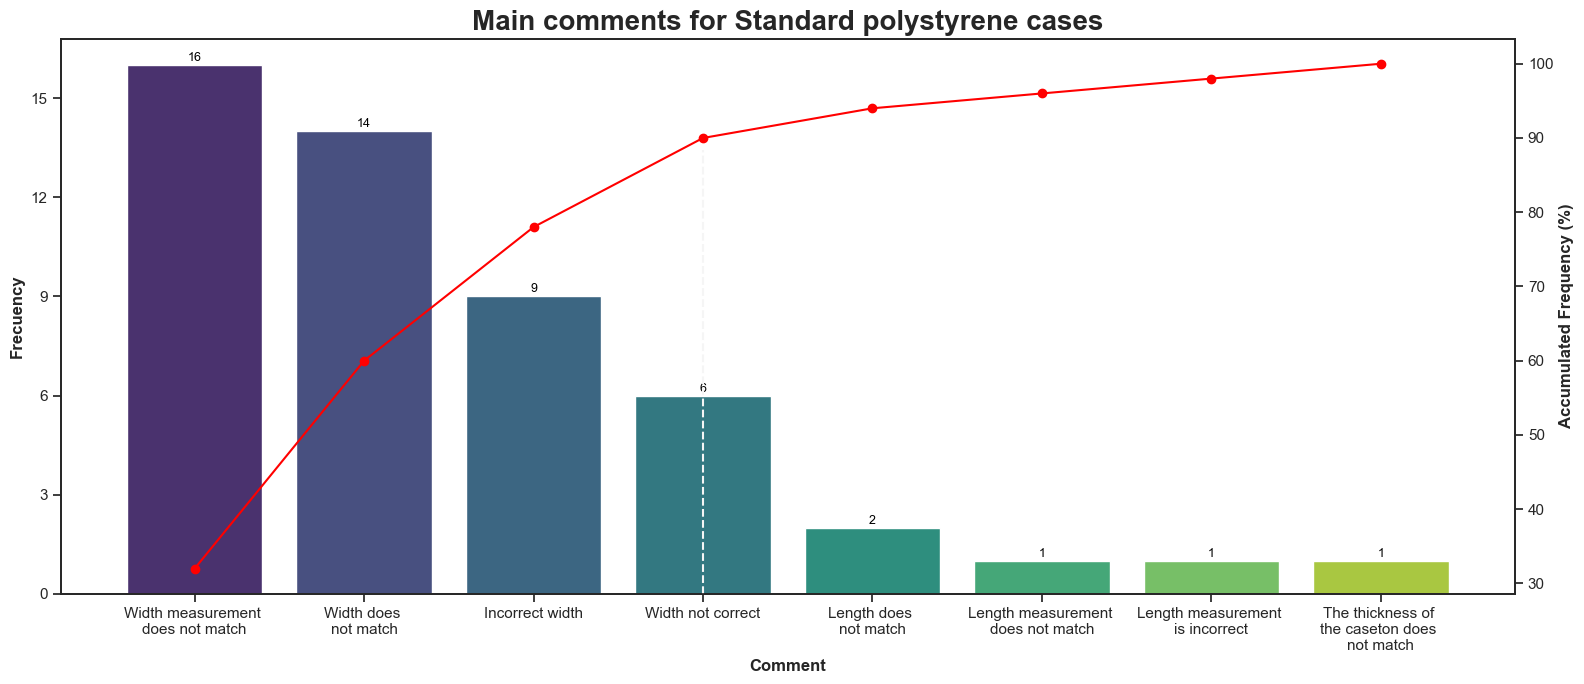

In [7]:
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(16, 7))
sns.set_theme(style="ticks")
# Bar chart / frequencies
sns.barplot(x=frequency.index, y=frequency.values, palette='viridis', ax=ax1)
ax1.set_ylabel('Frecuency', fontweight='bold', size=12)

# Set the interval on the y-axis
ax1.yaxis.set_major_locator(ticker.MultipleLocator(3))


# Line graph (right) for cumulative frequency
ax2 = ax1.twinx()
ax2.plot(accumulated_frecuency.index, accumulated_frecuency.values, color='red', marker='o')
ax2.set_ylabel('Accumulated Frequency (%)', fontweight='bold', size=12)

# Add dotted line at 80% of cumulative frequency
point_80 = accumulated_frecuency[accumulated_frecuency >= 80].index[0]
plt.axvline(x=point_80, color='whitesmoke', linestyle='--', ymin=0, ymax=80/100, label='80% Accumulated Frequency')

# Format settings
ax1.set_xlabel('Comment', fontweight='bold', size=12)
ax1.set_title('Main comments for Standard polystyrene cases', fontweight='bold', size=20)

# Rotate labels vertically on the x-axis
plt.xticks(rotation='vertical')

# Rotate labels vertically on the x-axis
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Number of defects analysis

In [137]:
df = pd.read_csv('./Annex_3_inspection.csv')

df.head()

,Product,Comments,Status,Type of defect
0,Standard polystyrene case,Width measurement \ndoes not match,NaN,Width
1,Standard polystyrene case,Width measurement \ndoes not match,NaN,Width
2,Standard polystyrene case,Width does \nnot match,NaN,Width
3,Standard polystyrene case,Width does \nnot match,NaN,Width
4,Standard polystyrene case,Width does \nnot match,NaN,Width


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



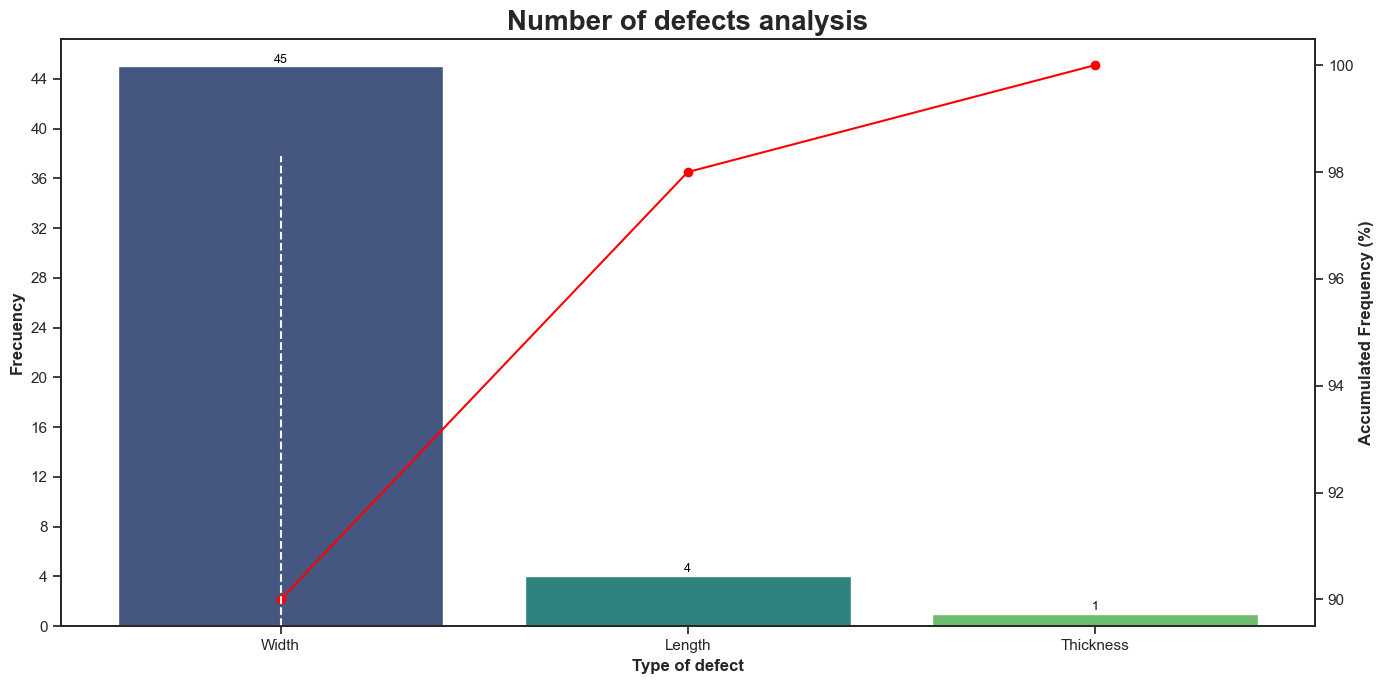

In [138]:

# The column to be anlizar of the csv is -> Comments
defects_column = 'Type of defect'

#Calculate the frequency of the values in the selected column
frequency_defect = df[defects_column].value_counts()
frequency_defect = frequency_defect.sort_values(ascending=False)

# Calculate the cumulative frequency
accumulated_frequency_defect = frequency_defect.cumsum() / frequency_defect.sum() * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart / frequencies
sns.barplot(x=frequency_defect.index, y=frequency_defect.values, palette='viridis', ax=ax1)
ax1.set_ylabel('Frecuency', fontweight='bold', size=12)

# Set the interval on the y-axis
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4))


# Line graph (right) for cumulative frequency
ax2 = ax1.twinx()
ax2.plot(accumulated_frequency_defect.index, accumulated_frequency_defect.values, color='red', marker='o')
ax2.set_ylabel('Accumulated Frequency (%)', fontweight='bold', size=12)

# Añadir línea punteada en el 80% de la frecuencia acumulada
point_80 = accumulated_frequency_defect[accumulated_frequency_defect >= 80].index[0]
plt.axvline(x=point_80, color='whitesmoke', linestyle='--', ymin=0, ymax=80/100, label='80% Accumulated Frequency')

# Format settings
ax1.set_xlabel('Type of defect', fontweight='bold', size=12)
ax1.set_title('Number of defects analysis', fontweight='bold', size=20)

# Rotate labels vertically on the x-axis
plt.xticks(rotation='vertical')

# Rotate labels vertically on the x-axis
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

## Creation of a new column "Type of defect" based on the comments of the measurements.

In [77]:
# Define the dictionary of correspondence between key words and defect types
defect_mapping = {
    'Width': 'Width',
    'width': 'Width',
    'Length': 'Length',
    'length': 'Length', 
    'Thickness': 'Thickness',
    'thickness': 'Thickness'
}

# Crear la nueva columna 'Type of defect' basada en las palabras clave usando el diccionario
df['Type of defect'] = df['Comments'].str.extract(f"({'|'.join(defect_mapping.keys())})", flags=re.IGNORECASE)[0].map(defect_mapping)

# Save the modified DataFrame in the same CSV file
df.to_csv('./Annex_3_inspection.csv', index=False)

print("A new column 'Type of defect' has been created in the CSV file")

A new column 'Type of defect' has been created in the CSV file


## Creating a new file to perform the weighted pareto with the defect types

In [78]:
# Obtener los valores únicos de la columna 'Type of defect'
unique_defect_types = df['Type of defect'].unique()

# Crear un nuevo DataFrame con los valores únicos
type_defects_df = pd.DataFrame(unique_defect_types, columns=['Type of defect'])

# Guardar el nuevo DataFrame en un archivo CSV llamado 'type_defects.csv'
new_file_path = './type_defects.csv' 
type_defects_df.to_csv(new_file_path, index=False)

print(f'The CSV file "type_defects.csv" has been created with the unique values of the "Type of defect" column.')

The CSV file "type_defects.csv" has been created with the unique values of the "Type of defect" column.


## Weighted acumulative cost Pareto by type of defect

In [109]:
# Calcular frecuencias
frequency_width = df['Type of defect'].str.count('Width').sum()
frequency_length = df['Type of defect'].str.count('Length').sum()
frequency_thickness = df['Type of defect'].str.count('Thickness').sum()

width_cost = 200
lenght_cost = 100
thickness_cost = 500
print(f'Frequency of "Width": {frequency_width}')
print(f'Frequency of "Length": {frequency_length}')
print(f'Frequency of "Thickness": {frequency_thickness}')

df_defects = pd.read_csv('./type_defects.csv')
df_defects['Frequency'] = [frequency_width, frequency_length, frequency_thickness]
df_defects['Cost'] = [width_cost, lenght_cost, thickness_cost]
df_defects['Frequency * Cost'] = df_defects['Frequency'] * df_defects['Cost']
df_defects.to_csv('./type_defects.csv', index=False)

Frequency of "Width": 45
Frequency of "Length": 4
Frequency of "Thickness": 1


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



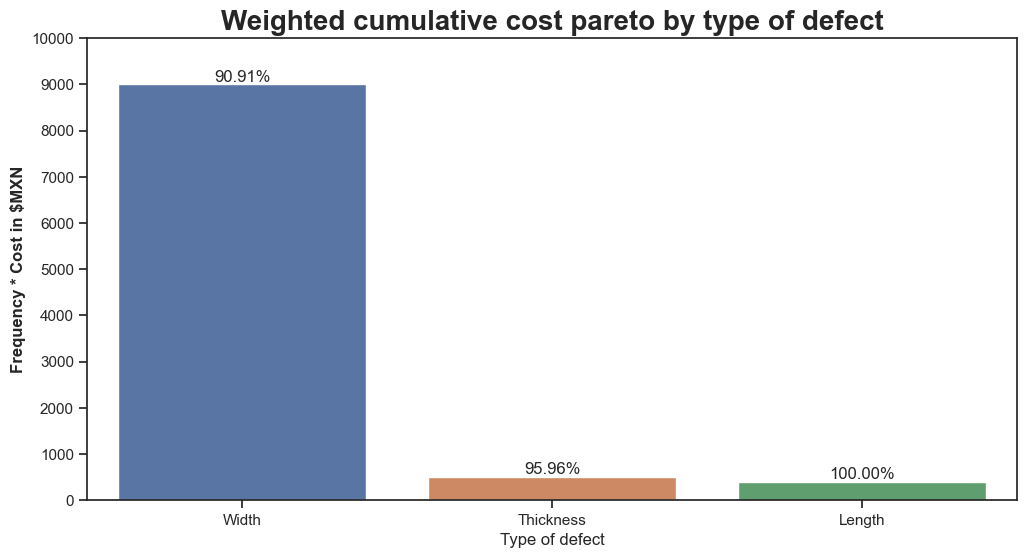

In [135]:
# Sort the data by 'Frequency * Cost' in descending order
data_sorted = df_defects.sort_values(by='Frequency * Cost', ascending=False)

# Create a Pareto chart
plt.figure(figsize=(12, 6))
pareto_plot = sns.barplot(x='Type of defect', y='Frequency * Cost', data=data_sorted, palette="deep")
plt.title('Weighted cumulative cost pareto by type of defect', fontweight='bold', size=20)
plt.ylabel('Frequency * Cost in $MXN', fontweight='bold', size=12)

# Ajustar la escala del eje y
plt.yticks(np.arange(0, 10001, 1000))


# Add cumulative percentages on the y-axis
total = sum(data_sorted['Frequency * Cost'])
cumulative_percentage = 0
for i, val in enumerate(data_sorted['Frequency * Cost']):
    cumulative_percentage += (val/total) * 100
    pareto_plot.text(i, val, f'{cumulative_percentage:.2f}%', ha='center', va='bottom')
plt.show()